## Normal Distribution
***

In [1]:
# define and explain main concepts
# visual plots to explain concepts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [2]:
np.random.normal()

-0.8704877714329321

### Introduction

### Definition

Normal distribution also known as Gaussian or bell-curved distribution is a type of continuous probability distribution for independent random variables [1](https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1129344614). 
Being a continuous distribution means that the values of variables can fall anywhere in its range unlike the discrete distribution with limited or finite outcomes. It is a symmetrically shaped distribution with most of its values gathering around the centre. It commonly occurs in nature and therefore represents a very important concept in inferential statistics for analysing and predicting properties of the population. 

**Probability density function** for the normal distribution is:

$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$$

x - random variable  
$\pi$ = 3.14159  
e = 2.71828  
$\mu$ - mean  
$\sigma$ - standard deviation  
$\sigma^2$ - variance

### Parameters

The main parameters of the normal distribution are the **mean** ($\mu$) representing the average and the **standard deviation** ($\sigma$) representing the measure of dispersion of data around the mean. The higher the standard deviation the wider the distribution. [2](https://en.wikipedia.org/wiki/Standard_deviation). While the $\mu$ and $\sigma$ are the parameters of the population, the standard deviation of a sample is represented with s and the mean with $\overline x$. Standard deviation is a square root of the variance $\sigma^2$.    

Using the formula we can plot the normal distribution setting the values of mu and sigma 

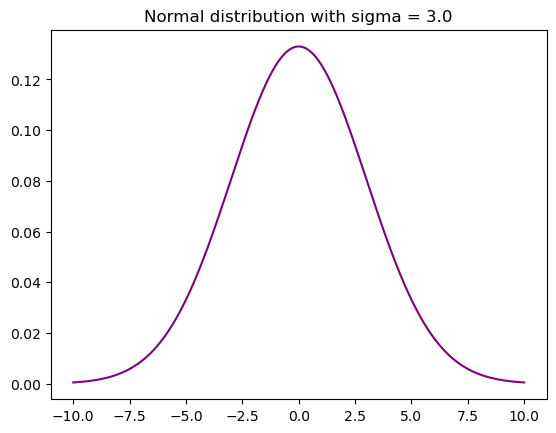

In [3]:
mu, sigma = 0.0, 3.0

# for the x axis we can use arange or the linspace function;
# if we are using a non-integer step, such as 0.1, better to use numpy.linspace

x = np.linspace(-10.0, 10.0, 10000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

plt.plot(x, y, color='purple')
plt.title('Normal distribution with sigma = 3.0');

In [4]:
# Changing sigma examples
# Plot everything together

To see how the distribution changes its shape we can change the value of sigma

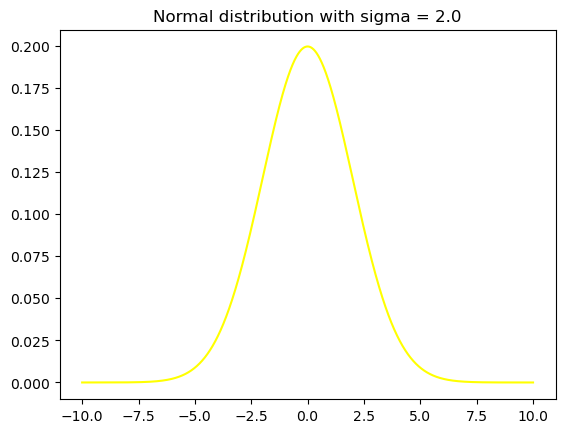

In [5]:
mu, sigma = 0.0, 2.0

x = np.linspace(-10.0, 10.0, 10000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

plt.plot(x, y, color='yellow')
plt.title('Normal distribution with sigma = 2.0');

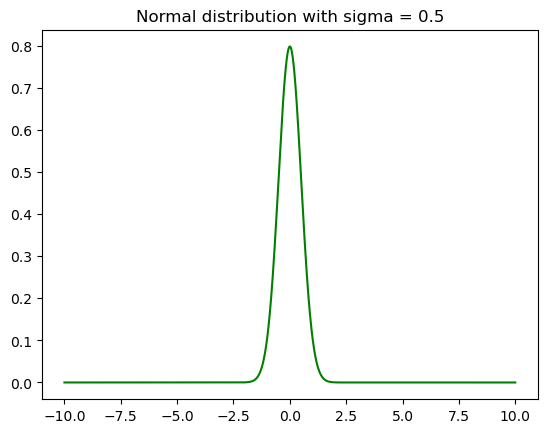

In [6]:
mu, sigma = 0.0, 0.5

x = np.linspace(-10.0, 10.0, 10000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

plt.plot(x, y, color='green')
plt.title('Normal distribution with sigma = 0.5');

From the above distributions we can see how data spread or sigma value changes the shape of distribution around the mean. The lower the sigma the closer the data are to the distribution's mean.  
In case of changing the value of the mean the distribution would be moved to the left or right, centering around the mean value without affecting the spread.

#### Standard Deviation and Standard Error

It is worth noting the distinction between the standard deviation (SD) and the standard error (SE). While both represent the measure of variability, the standard deviation shows how far are the values from the sample mean and the standard error shows the variability between multiple samples and their means. If the standard error is high the sample means are further from the population mean and if the standard error is small, the sample means are good estimator of the population mean [3](https://statisticsbyjim.com/basics/difference-standard-deviation-vs-standard-error/). The distribution to show the standard error is called the sampling distribution. 



#### Another way of writing the formula: 

_The formula was taken from Khan, S., reference at the bottom of the notebook_ [4](https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/more-on-normal-distributions/v/introduction-to-the-normal-distribution)

$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$

$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2} (\frac {x-\mu}{\sigma})^2}$

$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} (e^{(\frac {x-\mu}{\sigma})^2}) ^ {-\frac{1}{2}}$

$p(x) = \frac{1}{\sqrt{{2\pi \sigma^2} {e^{z}}^2}}$



#### z-scores 

Writing the formula this way gives a clearer picture of its elements. In this case _z_ represents the number of standard deviations the value is away from the mean. _z-scores_ are also called the _standard scores_ or the _z-values_. The formula is:    
 
$$z = \frac {x-\mu}{\sigma}$$

where $x-\mu$ represents the distance between the given datapoint and the mean dividing it by standard deviation $\sigma$. In case of a sample the formula is:  
    
$$ z = \frac {x-\overline x}{s} $$  

_x_ is the value or the datapoint we are interested in, $\overline x$ is the mean of the sample and s is the standard deviation.[4](https://en.wikipedia.org/wiki/Standard_score)

With multiple samples we are checking how many standard errors are the sample means from the population mean. The formula for standard error is:  
    
$$ SE = \frac {\sigma}{\sqrt {n}} $$

while the formula for z-scores for multiple samples is:  
    
 $$ z = \frac {x-\mu}{{\sigma} /{\sqrt {n}}} $$

It is worth noting that if we have more samples (n) the standard deviation will get smaller, if we have less samples the standard deviation will get larger.

Z-scores represent a good tool for navigating and interpreting results since it tells us how many standard deviation we are from the mean which gives us more orientation of how values are placed. Positive z-scores tell us how many standard deviations we are above the mean while the negative z-scores tell us how many standard deviations we are below the mean. One of the ways to use z-scores is finding the outliers in data depending on the threshold of z-scores, usually it is a -3 standard deviations or 3 standard deviations, anything below or above these values can be considered an outlier. 

In [7]:
# example with scipy

#### Empirical rule

Empirical, 68-95-99.7 or three-sigma rule applies to the percentage of the values depending on how many standard deviations we are from the mean in a normal, Gaussian distribution. If we are one standard deviation from the mean in both directions we are going to have 65% of the values falling into that range, 95% of the values will fall into two standard deviations range and 99,7% into 3 standard deviation range. By following this rule we can say that 99.7% of data fall within three standard deviations from the mean. 

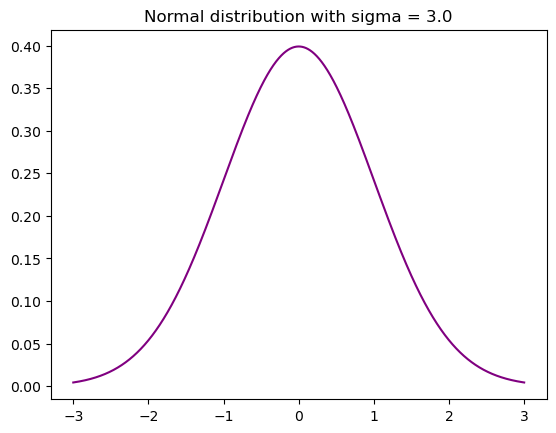

In [12]:
mu, sigma = 0.0, 1.0

x = np.linspace(-3, 3.0, 100000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

plt.plot(x, y, color='purple')
plt.title('Normal distribution with sigma = 3.0');

In [ ]:
fig, ax = plt.subplots(figsize=(7,6))
ax.boxplot(morley_experiments, whiskerprops = dict(linestyle='--'), medianprops=dict(color='#000000'));
ax.set_xlabel('Experiment No.')
ax.set_ylabel('Speed of light (km/s minus 299,000)');
ax.axhline(y=790, color='red', linewidth=1, label='true speed')
ax.text(x=2.7, y=770, s='true speed');

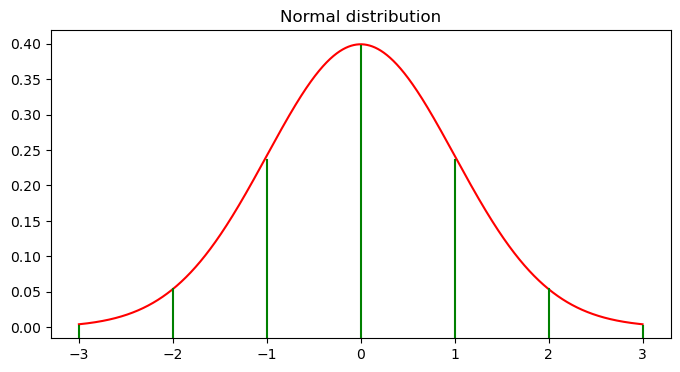

In [64]:
mu, sigma = 0.0, 1.0

x = np.linspace(-3, 3.0, 100000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y, color='red')
ax.axvline(x=1, color='green', ymax=0.58)
ax.axvline(x=0, color='green', ymax=0.95)
ax.axvline(x=2, color='green', ymax=0.16)
ax.axvline(x=3, color='green', ymax=0.04)
ax.axvline(x=-1, color='green', ymax=0.58)
ax.axvline(x=-2, color='green', ymax=0.16)
ax.axvline(x=-3, color='green', ymax=0.04)
ax.set_title('Normal distribution');

Explore:  
 * Measures of Central Tendency  
 * Central Limit Theorem
 * Skewness 
 * Kurtosis
 * pdf and cdf  
 * parameters  
 * empirical rule  
 * maximum entropy distribution?
 * z-values



### References:
 * Mcloughlin, I., (2022). GitHub repository, https://github.com/ianmcloughlin/2223-S1-fund-data-analysis/blob/main/notebooks/04-outliers.ipynb  
 * Wikipedia contributors. (2022, December 24). Normal distribution. In Wikipedia, The Free Encyclopedia. Retreived December 26, 2022 from https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1129344614  
 * Wikipedia contributors. (2022, November 9). Standard deviation. In Wikipedia, The Free Encyclopedia. Retrieved December 27, 2022 from https://en.wikipedia.org/w/index.php?title=Standard_deviation&oldid=1120954441  
 * https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html  
 * https://statisticsbyjim.com/basics/difference-standard-deviation-vs-standard-error/  
 * Khan, S. (n.d.). Deep definition of the normal distribution. Khan Academy, Retrieved December 30, 2022 from https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/more-on-normal-distributions/v/introduction-to-the-normal-distribution  
 * Wikipedia contributors. (2022, December 19). Standard score. In Wikipedia, The Free Encyclopedia. Retrieved January 2, 2023 from https://en.wikipedia.org/w/index.php?title=Standard_score&oldid=1128321544  
    